## HCDE 410 Final Project Report: Seattle-Tacoma Airport Operations ##

#### Arissa Zheng, HCDE 410, Spring 2022 ####
This study expores Seattle-Tacoma International Airport's busyness and operations as a result of the COVID-19 pandemic. Though it's known that COVID has had a negative impact on travel, this study quantifies the impact COVID had on Seatac's operations. This study applies specifically to Seatac operations, which can also help passengers and travelers anticipate airport traffic before traveling. 

### Background ###
Currently, most research on SeaTac airport is information from the government, or is focused on economic and environmental impact of the airport operations. For example, a study conducted by faculty in UW's Department of Civil & Environmental Engineering found that [neighborhoods surrounding the airport are affected by ultrafine particles of air pollution directly caused by airplane operations](https://deohs.washington.edu/mov-up?_ga=2.33803617.170507914.1652679812-585657135.1625191866). Other similar studies focus on a general effect on airports all over the nation, and tend to focus on the economic losses. A study conducted by Hotle (2021) found that [domestic departures in the US declined by 71.5% in May 2020 compared to the previous year](https://doi.org/10.1016/j.trip.2020.100277). This study uses data also provides [possible datasets](https://www.transtats.bts.gov/) that may be useful for reference in my analysis.

It's widely known that the COVID-19 pandemic has had a huge impact on travel. Prior studies focus on the nation-wide impacts that COVID-19 has had on travel operations, while in this study I focus specifically on SeaTac airport, with more insight on specific operations at the airport (TSA, number of flights, etc.) while still considering the impacts of COVID-19 on airports beyond just the economy. These findings are also applicable to ordinary traveller lives--finding out when might be the best time to travel. This research study uses basic descriptive statistics such as averages and reduction rates to find the busiest operation times and decline in operations due to COVID. These findings may be applicable to further studies hoping to establish stronger correlation between subjects such as travelling and pandemics.

### Research Questions and Hypotheses ###
1. When is the best (least busy) time to travel through SeaTac airport?
    - Hypothesis: The best time to travel through SeaTac airport is right after the end of holiday seasons, such as in February and March (Around Weeks 4-10). 
2. How has the COVID-19 pandemic impacted travel operations through SeaTac airport?
    - Hypothesis: COVID-19 caused a decrease in travel in 2020 from the beginning of the year to the end, and airport operations are picking up now at the end of 2021 to 2022. 
3. How does SeaTac airport compare to other airports nationwide?
    - Hypothesis: Like other airports, SeaTac and all other airports were negatively impacted by the pandemic due to travel restrictions and concerns with the virus. 

### Methodology & Findings ###
**Analysis Method**

Because the aim of this research study is to explore how the COVID-19 pandemic affected travel operations and find the least busy time to travel, I analyze data and identify patterns in airport operations using descriptive statistics and basic code. This will be similar to the strategies used in [Assignments 1 and 2](https://jupyter.rttl.uw.edu/2022-spring-hcde-410-a/hub/user-redirect/lab/tree/hcde-410-final) where I compare values in SeaTac's operations to identify what time of year is the least busy operation-wise. I also use this same strategy to calculate how operations may have declined throughout the COVID-19 pandemic--finding a numeric value for the decrease and a percentage compared to the previous year and pre-COVID. The dataset for departures nation-wide by date can also be converted to a weekly-basis, and then calculated to find a decrease and decline in operations. Two datasets are used in this study: one from the Port of Seattle, which the weekly operation numbers (such as TSA screening counts and number of flights) at SeaTac airport from 2019-2022. The other dataset is from the Bureau of Transportation Statistics, which contains information departure flights (both domestic and international) abd TSA screening numbers for each day out of the US, from 2019-2022.

Due to the Port of Seattle dataset not being formatted correctly, I manually reformatted the csv file. The BTS dataset also contains a category of data that I do not use--later in my data analysis, I use the dataset to create a new dataset with weekly counts of operations instead of daily. 

I mainly focus on the numbers for aircraft operations (both international and domestic, combined) and TSA screening numbers. 

**Datasets**

[Number of people or flights through SeaTac aiport by week 2019-2022](https://docs.google.com/spreadsheets/d/1N1RQ85hr3C5TQA-akJvucdtECftx_AmNGWwKsnKCltg/edit#gid=0)

[Commercial Aviation Departures--number of departures/people screened on a certain date ](https://data.bts.gov/Aviation/Commercial-Aviation-Departures-and-TSA-Screenings-/hvq3-38u5)

### Data Analysis & Findings ###

Prepare the two datasets for data analysis by storing the information in a dictionary format. 

In [3]:
import csv

# Take .csv file and convert to dictionary
def prepare_datasets(file_path): 
    with open(file_path) as infile:
        reader = csv.DictReader(infile, delimiter=',')
        list_of_dicts = [dict(r) for r in reader]
        
    return list_of_dicts

# Create dictionary with SeaTac dataset
seatac_data = prepare_datasets("SeaTac Operations.csv")

from pprint import pprint 

# pprint(seatac_data)


#### Q1: When is the best (least busy) time to travel through SeaTac airport? ####

The first step is to read through the dictionary of seatac_data and find the highest numbers for each category of operations (TSA screened, aircraft, roadway traffic, and ground transportation) to check the consistency of busyness among different types of operations in the 4 years (2019-2022). 

Below I created a method that takes the data set and a year value to find the busiest and least busy week of operations for each category--TSA screenings, aircraft traffic, roadway traffic, ground transportation in each you. 

In [4]:
def stat_by_year(year, data):
    all_stats = {}
    tsa_stat = ['high', 0, 'low', 1000000]
    aircraft_stat = ['high', 0, 'low', 1000000]
    road_stat = ['high', 0, 'low', 1000000]
    gt_stat = ['high', 0, 'low', 1000000]
    for each in data:
        if (each['Year'] == year):
            if (each['Mode'] == 'TSA Screened Volume'):
                # Data in .csv contains ',' removed to convert value to int
                new_int = int(each['Count'].replace(',', ''))
                if (new_int >= int(tsa_stat[1])):
                    tsa_stat[0] = "Week " + each['Week Number']
                    tsa_stat[1] = new_int
                if (new_int <= int(tsa_stat[3])):
                    tsa_stat[2] = "Week " + each['Week Number']
                    tsa_stat[3] = new_int
            elif (each['Mode'] == 'Aircraft Operations'):
                new_int = int(each['Count'].replace(',', ''))
                if (new_int >= int(aircraft_stat[1])):
                    aircraft_stat[0] = "Week " + each['Week Number']
                    aircraft_stat[1] = new_int
                if (new_int <= int(aircraft_stat[3])):
                    aircraft_stat[2] = "Week " + each['Week Number']
                    aircraft_stat[3] = new_int
            elif (each['Mode'] == 'Roadway Traffic'):
                new_int = int(each['Count'].replace(',', ''))
                if (new_int >= int(road_stat[1])):
                    road_stat[0] = "Week " + each['Week Number']
                    road_stat[1] = new_int
                if (new_int <= int(road_stat[3])):
                    road_stat[2] = "Week " + each['Week Number']
                    road_stat[3] = new_int
            elif (each['Mode'] == 'GT Operations'):
                new_int = int(each['Count'].replace(',', ''))
                if (new_int >= int(gt_stat[1])):
                    gt_stat[0] = "Week " + each['Week Number']
                    gt_stat[1] = new_int
                if (new_int <= int(gt_stat[3])):
                    gt_stat[2] = "Week " + each['Week Number']
                    gt_stat[3] = new_int  
    all_stats["tsa_stat"] = tsa_stat
    all_stats["aircraft_stat"] = aircraft_stat
    all_stats["road_stat"] = road_stat
    all_stats["gt_stat"] = gt_stat
    return all_stats

# Check each operation for each year 
stat19 = stat_by_year('2019', seatac_data)
stat20 = stat_by_year('2020', seatac_data)
stat21 = stat_by_year('2021', seatac_data)
stat22 = stat_by_year('2022', seatac_data)

# Print out the highest and lowest counts
def print_ops (stat, year):
    print("Seatac Operations in " + year)
    print("TSA Screenings were highest in " + stat['tsa_stat'][0] + " at " + str(stat['tsa_stat'][1]))
    print("TSA Screenings were lowest in " + stat['tsa_stat'][2] + " at " + str(stat['tsa_stat'][3]))
    print("Aircraft Operations were highest in " + stat['aircraft_stat'][0] + " at " + str(stat['aircraft_stat'][1]))
    print("Aircraft Operations were lowest in " + stat['aircraft_stat'][2] + " at " + str(stat['aircraft_stat'][3]))
    print("Road Traffic was highest in " + stat['road_stat'][0] + " at " + str(stat['road_stat'][1]))
    print("Road Traffic was lowest in " + stat['road_stat'][2] + " at " + str(stat['road_stat'][3]))
    print("Ground Transportation Operations were highest in " + stat['gt_stat'][0] + " at " + str(stat['gt_stat'][1]))
    print("Ground Transportation Operations were lowest in " + stat['gt_stat'][2] + " at " + str(stat['gt_stat'][3]) + "\n")
    
print_ops(stat19, '2019')
print_ops(stat20, '2020')
print_ops(stat21, '2021')
print_ops(stat22, '2022')

Seatac Operations in 2019
TSA Screenings were highest in Week 33 at 70300
TSA Screenings were lowest in Week 6 at 41100
Aircraft Operations were highest in Week 33 at 1410
Aircraft Operations were lowest in Week 6 at 1010
Road Traffic was highest in Week 33 at 53100
Road Traffic was lowest in Week 27 at 25300
Ground Transportation Operations were highest in Week 29 at 7100
Ground Transportation Operations were lowest in Week 48 at 4770

Seatac Operations in 2020
TSA Screenings were highest in Week 1 at 49300
TSA Screenings were lowest in Week 16 at 2600
Aircraft Operations were highest in Week 1 at 1200
Aircraft Operations were lowest in Week 18 at 370
Road Traffic was highest in Week 1 at 46400
Road Traffic was lowest in Week 16 at 6200
Ground Transportation Operations were highest in Week 9 at 5930
Ground Transportation Operations were lowest in Week 16 at 430

Seatac Operations in 2021
TSA Screenings were highest in Week 33 at 51300
TSA Screenings were lowest in Week 5 at 12900
Airc

Below are some visualizations of SeaTac's operation counts from 2019-2022 with Aircraft Operations and TSA Screenings. 

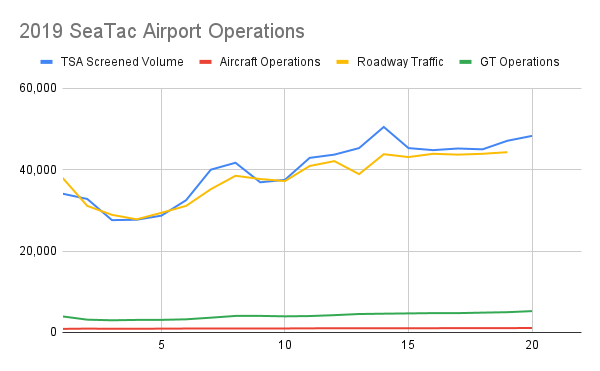

In [5]:
from IPython.display import Image
Image("img/2019 SeaTac Airport Operations.png")

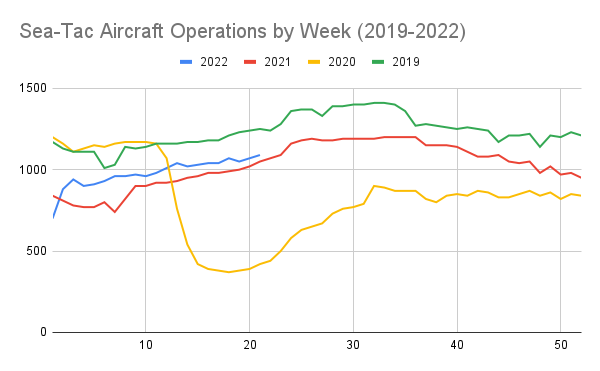

In [6]:
Image("img/Sea-Tac Aircraft Operations by Week (2019-2022).png")

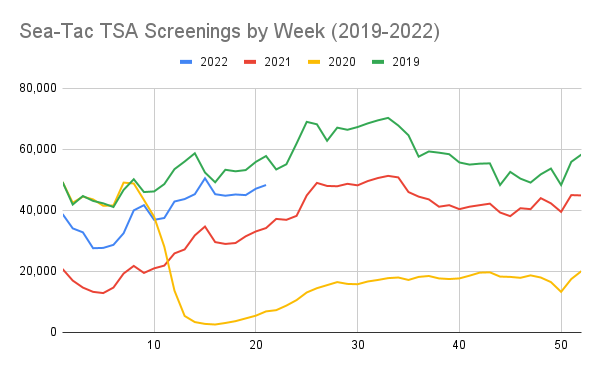

In [7]:
Image("img/Sea-Tac TSA Screenings by Week (2019-2022).png")

From the code calculations, it seems that: 
- In 2019, the busiest weeks ranged from 29-33, while it was least busy in week 6.
- In 2020, busiest week was during week 1, and the airport was least busy around week 16. 
    - The first cases of COVID-19 in Seattle were detected at the end of January, and strongly affected travel for the rest of the year. 
- In 2021, it was also busiest in the week 33-36 range, and least busy between week 5-7. 
- In 2022, it was busiest during weeks 15-20, and least busy during weeks 4-5. 
    - However, the year has not completed yet, so these may not be the final busiest and least busy weeks of the year. 

In the graphs above, the lowest point of operation in each year (excluding 2020 due to special circumstances) is generally around week 3-6, which is the end of January to mid-February. The highest counts of operations are around week 30-33 (end of July to mid-August). These are thus the *best* and *worst* times to travel through SeaTac airport, respectively. 

### Q2: How has the COVID-19 pandemic impacted travel operations through SeaTac airport? ###

Using the previous findings from Q1, we can compare a timeline of COVID to the airport operations timeline. For this question, I decided to focus on TSA screenings and aircraft operations for this section and compare the average values each year, as these are the best representation of how many people are actually travelling through the airport. 

Because the dataset has four different types of operation counts, I first need to divide the dataset into the two operations I focus on--aircraft operations and TSA screening numbers. 

In [8]:
tsa_data = []
aircraft_data = []

# Created dictionary for only TSA screening data and only Aircraft Operation data

for each in seatac_data: 
    if (each['Mode'] == 'TSA Screened Volume'):
        tsa_data.append(each)
    elif (each['Mode'] == 'Aircraft Operations'):
        aircraft_data.append(each)

# Calculate the average operation value of each year (for later)
def year_avg(year, data):
    total_val = 0;
    total_weeks = 0;
    for value in data:
        if (value['Year'] == year):
            new_int = int(value['Count'].replace(',', ''))
            total_val += new_int
            total_weeks += 1
    return total_val / total_weeks
            
print("Average TSA operations in 2019 was " + str(year_avg('2019', tsa_data)))
print("Average TSA operations in 2020 was " + str(year_avg('2020', tsa_data)))
print("Average TSA operations in 2021 was " + str(year_avg('2021', tsa_data)))
print("Average TSA operations in 2022 was " + str(year_avg('2022', tsa_data)))

print("Average aircraft operations in 2019 was " + str(year_avg('2019', aircraft_data)))
print("Average aircraft operations in 2020 was " + str(year_avg('2020', aircraft_data)))
print("Average aircraft operations in 2021 was " + str(year_avg('2021', aircraft_data)))
print("Average aircraft operations in 2022 was " + str(year_avg('2022', aircraft_data)))

Average TSA operations in 2019 was 55361.53846153846
Average TSA operations in 2020 was 19863.46153846154
Average TSA operations in 2021 was 35792.307692307695
Average TSA operations in 2022 was 39828.57142857143
Average aircraft operations in 2019 was 1234.2307692307693
Average aircraft operations in 2020 was 812.1153846153846
Average aircraft operations in 2021 was 1027.5
Average aircraft operations in 2022 was 978.5714285714286


So on average, in 2019, there were approximately 55362 people going through TSA screenings per week, however, this drops in 2020 to 19863 people per week, and although increasing the next year in 2021, it is still around a 35% decrease from the average operation per week in 2019. Similarly, aircraft operations also decreased in 2020, and while increasing from the previous year in 2021, it still doesn't surpass the average count in 2019. 

Next--graphing the count of total TSA screening operations per year. 

{'2019': 2878800, '2020': 1032900, '2021': 1861200, '2022': 836400}


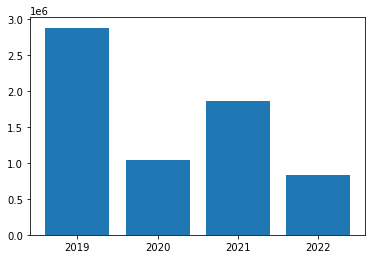

In [9]:
import matplotlib.pyplot as plt

operation_dict = {'2019' : 0, '2020' : 0, '2021' : 0, '2022' : 0}
for each in seatac_data:
    new_int = int(each['Count'].replace(',', ''))
    if (each['Mode'] == 'TSA Screened Volume'):   
        if each['Year'] == '2019':
            operation_dict['2019'] += new_int
        elif each['Year'] == '2020':
            operation_dict['2020'] += new_int
        elif each['Year'] == '2021':
            operation_dict['2021'] += new_int
        else: 
            operation_dict['2022'] += new_int

pprint(operation_dict)

names = list(operation_dict.keys())
values = list(operation_dict.values())

plt.bar(range(len(operation_dict)), values, tick_label=names)
plt.show()

And total aircraft operations per year at Seatac. 

{'2019': 64180, '2020': 42230, '2021': 53430, '2022': 20550}


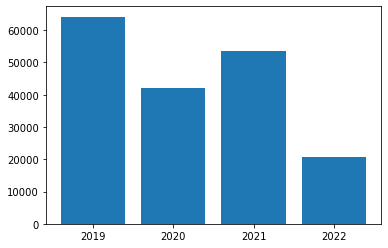

In [10]:
flight_dict = {'2019' : 0, '2020' : 0, '2021' : 0, '2022' : 0}
for each in seatac_data:
    new_int = int(each['Count'].replace(',', ''))
    if (each['Mode'] == 'Aircraft Operations'):   
        if each['Year'] == '2019':
            flight_dict['2019'] += new_int
        elif each['Year'] == '2020':
            flight_dict['2020'] += new_int
        elif each['Year'] == '2021':
            flight_dict['2021'] += new_int
        else: 
            flight_dict['2022'] += new_int

pprint(flight_dict)

names = list(flight_dict.keys())
values = list(flight_dict.values())

plt.bar(range(len(flight_dict)), values, tick_label=names)
plt.show()

The same effect is observed in the total operations for both types. The study referenced previously (Hotle 2021) found that domestic departures declined by 71.5% in May 2020 compared to the previous year. 

With this analysis, there was a 34% decrease in aircraft operations in 2020 from 2019, and a 64% decline in TSA screening numbers. Operations were still lower in 2021 than in 2019. 

This confirms the hypothesis that COVID-19 negatively impacted airport operations, with less people and aircrafts at Seatac in 2020 compared to prior years. With the recovery and boosted immunity towards the virus, airport operations also seem to be recovering, increasing, though not completely back to the numbers prior to COVID. There was a more drastic decrease effect on the number of passengers compared to the number of aircrafts. 

### Q3: How does SeaTac airport compare to other airports nationwide? ###

In [11]:
# Prepare national travel operation data
flight_data = prepare_datasets("Commercial_Aviation_Departures_and_TSA_Screenings__simplified_.csv")

Since the BTS dataset has more information than needed, split the current datasets into TSA screening data and all flight data--combining both the domestic and international number of flights. Then the add total counts for each week (originally by date) in the two types of operations. 

In [12]:
new_fdata = []
new_tsa = []

# Split into dictionaries for TSA screenings and flights
for flight in flight_data: 
    if (flight['Indicator'] == 'People Screened at All Airports'):
        new_tsa.append(flight)
    elif (flight['Indicator'] == 'U.S. International Commercial Flights (Departures)' or 
          flight['Indicator'] == 'U.S. Domestic Commercial Flights (Departures)'):
        new_fdata.append(flight)

# Dictionary with total flight operation counts in each year
flightyear_dict = {'2019' : 0, '2020' : 0, '2021' : 0, '2022' : 0}
# Dictionary to add up weekly operations
flightweek_dict = {'2019' : {}, '2020' : {}, '2021' : {}, '2022' : {}}

for each in new_fdata:
    if each['Year'] == '2019':
        flightyear_dict['2019'] += int(each['Current'])
        flightweek_dict["2019"][each['Week Number']] = flightweek_dict["2019"].get(each['Week Number'], 0) + int(each['Current'])
    elif each['Year'] == '2020': 
        flightyear_dict['2020'] += int(each['Current'])
        flightweek_dict["2020"][each['Week Number']] = flightweek_dict["2020"].get(each['Week Number'], 0) + int(each['Current'])
    elif each['Year'] == '2021': 
        flightyear_dict['2021'] += int(each['Current'])
        flightweek_dict["2021"][each['Week Number']] = flightweek_dict["2021"].get(each['Week Number'], 0) + int(each['Current'])
    elif each['Year'] == '2022': 
        flightyear_dict['2022'] += int(each['Current'])
        flightweek_dict["2022"][each['Week Number']] = flightweek_dict["2022"].get(each['Week Number'], 0) + int(each['Current'])

# Dictionary with total TSA operation counts in each year
tsayear_dict = {'2019' : 0, '2020' : 0, '2021' : 0, '2022' : 0}
# Dictionary to add up weekly operations
tsaweek_dict = {'2019' : {}, '2020' : {}, '2021' : {}, '2022' : {}}

for each in new_tsa:
    if each['Year'] == '2019':
        tsayear_dict['2019'] += int(each['Current'])
        tsaweek_dict["2019"][each['Week Number']] = tsaweek_dict["2019"].get(each['Week Number'], 0) + int(each['Current'])
    elif each['Year'] == '2020': 
        tsayear_dict['2020'] += int(each['Current'])
        tsaweek_dict["2020"][each['Week Number']] = tsaweek_dict["2020"].get(each['Week Number'], 0) + int(each['Current'])
    elif each['Year'] == '2021': 
        tsayear_dict['2021'] += int(each['Current'])
        tsaweek_dict["2021"][each['Week Number']] = tsaweek_dict["2021"].get(each['Week Number'], 0) + int(each['Current'])
    elif each['Year'] == '2022': 
        tsayear_dict['2022'] += int(each['Current'])
        tsaweek_dict["2022"][each['Week Number']] = tsaweek_dict["2022"].get(each['Week Number'], 0) + int(each['Current'])

# pprint(tsaweek_dict)


Now, I want to find the highest and lowest weeks and values in each year for nationwide, like for Q1. I also want perform some calculations with values to see the proportion of Seatac operations to nationwide values (percentage-wise). 

In [126]:
# Find lowest and highest weeks of operation
def busyweek (dataset):
    busytime = {'2019' : ['low', 100000000, 'high', 0], '2020' :['low', 100000000, 'high', 0], '2021' : ['low', 100000000, 'high', 0], '2022' : ['low', 100000000, 'high', 0]} 
    for week in dataset['2019']:
        week_count = dataset['2019'][week]
        if (week_count <= busytime['2019'][1]):
            busytime['2019'][1] = week_count
            busytime['2019'][0] = week
        if (week_count >= busytime['2019'][3]):
            busytime['2019'][3] = week_count
            busytime['2019'][2] = week
    for week in dataset['2020']:
        week_count = dataset['2020'][week]
        if (week_count <= busytime['2020'][1]):
            busytime['2020'][1] = week_count
            busytime['2020'][0] = week
        if (week_count >= busytime['2020'][3]):
            busytime['2020'][3] = week_count
            busytime['2020'][2] = week
    for week in dataset['2021']:
        week_count = dataset['2021'][week]
        if (week_count <= busytime['2021'][1]):
            busytime['2021'][1] = week_count
            busytime['2021'][0] = week
        if (week_count >= busytime['2021'][3]):
            busytime['2021'][3] = week_count
            busytime['2021'][2] = week
    for week in dataset['2022']:
        week_count = dataset['2022'][week]
        if (week_count <= busytime['2022'][1]):
            busytime['2022'][1] = week_count
            busytime['2022'][0] = week
        if (week_count >= busytime['2022'][3]):
            busytime['2022'][3] = week_count
            busytime['2022'][2] = week
    return busytime

busy_tsa = busyweek(tsaweek_dict)
print("In 2019, TSA Screenings were highest in Week " + busy_tsa['2019'][2] + " at " + str(busy_tsa['2019'][3]))
print("In 2019, TSA Screenings were lowest in Week " + busy_tsa['2019'][0] + " at " + str(busy_tsa['2019'][1]))
print("In 2020, TSA Screenings were highest in Week " + busy_tsa['2020'][2] + " at " + str(busy_tsa['2020'][3]))
print("In 2020, TSA Screenings were lowest in Week " + busy_tsa['2020'][0] + " at " + str(busy_tsa['2020'][1]))
print("In 2021, TSA Screenings were highest in Week " + busy_tsa['2021'][2] + " at " + str(busy_tsa['2021'][3]))
print("In 2021, TSA Screenings were lowest in Week " + busy_tsa['2021'][0] + " at " + str(busy_tsa['2021'][1]))

busy_flight = busyweek(flightweek_dict)
print("In 2019, Aircraft Operations were highest in Week " + busy_flight['2019'][2] + " at " + str(busy_flight['2019'][3]))
print("In 2019, Aircraft Operations were lowest in Week " + busy_flight['2019'][0] + " at " + str(busy_flight['2019'][1]))
print("In 2020, Aircraft Operations were highest in Week " + busy_flight['2020'][2] + " at " + str(busy_flight['2020'][3]))
print("In 2020, Aircraft Operations were lowest in Week " + busy_flight['2020'][0] + " at " + str(busy_flight['2020'][1]))
print("In 2021, Aircraft Operations were highest in Week " + busy_flight['2021'][2] + " at " + str(busy_flight['2021'][3]))
print("In 2021, Aircraft Operations were lowest in Week " + busy_flight['2021'][0] + " at " + str(busy_flight['2021'][1]))
print("In 2022, Aircraft Operations were highest in Week " + busy_flight['2022'][2] + " at " + str(busy_flight['2022'][3]))
print("In 2022, Aircraft Operations were lowest in Week " + busy_flight['2022'][0] + " at " + str(busy_flight['2022'][1]))


In 2019, TSA Screenings were highest in Week 53 at 26852722
In 2019, TSA Screenings were lowest in Week 5 at 12640132
In 2020, TSA Screenings were highest in Week 8 at 15430846
In 2020, TSA Screenings were lowest in Week 16 at 674932
In 2021, TSA Screenings were highest in Week 30 at 14128424
In 2021, TSA Screenings were lowest in Week 5 at 4695483
In 2019, Aircraft Operations were highest in Week 53 at 352999
In 2019, Aircraft Operations were lowest in Week 5 at 193211
In 2020, Aircraft Operations were highest in Week 11 at 218346
In 2020, Aircraft Operations were lowest in Week 17 at 58113
In 2021, Aircraft Operations were highest in Week 49 at 193613
In 2021, Aircraft Operations were lowest in Week 8 at 112236
In 2022, Aircraft Operations were highest in Week 13 at 188986
In 2022, Aircraft Operations were lowest in Week 6 at 162404


- In 2019, the busiest week was week 53 while the least busy week was week 5
- In 2020, airports were busiest during weeks 8-11, and least busy during weeks 16-17
- In 2021, weeks 30 and 49 were the busiest, and weeks 5-8 were the least busy. 
- In 2022, the busiest week for airports was week 13, while it was lowest at week 6. 

This supports the finding in Q1 that generally, it is least busy between weeks 3-6, but earlier findings found that it was busiest between 30-33, however, there seems to be no pattern to when the busiest week is.

Next, I calculate the average operations per week for each year and plot the data using a bar chart. 

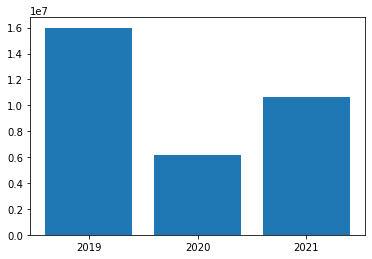

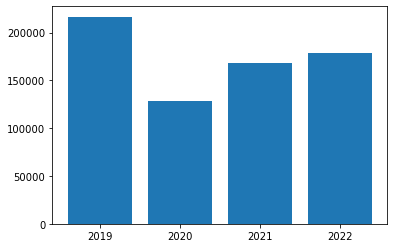

In [14]:
# Method calculates the average
def year_avg(data):
    averages = {}
    for value in data:
        total_val = 0;
        total_weeks = 0;
        for each in data[value]:
            total_val += int(data[value][each])
            total_weeks += 1
        if (total_weeks == 0):
            return averages
        else: 
            averages[value] = (total_val / total_weeks)
    return averages

flight_ops = year_avg(flightweek_dict)
tsa_ops = year_avg(tsaweek_dict)

names = list(tsa_ops.keys())
values = list(tsa_ops.values())

plt.bar(range(len(tsa_ops)), values, tick_label=names)
plt.show()

names = list(flight_ops.keys())
values = list(flight_ops.values())

plt.bar(range(len(flight_ops)), values, tick_label=names)
plt.show()


This data also supports the findings from Q2, with a decline in operations in 2020, and an increase in 2021. 

Using the average operations for Seatac airport and average operations nationwide, I can calculate approximately what percentage of the nation's air travel Seatac accounts for--0.33% of the TSA screenings and 0.51% of the aircraft operations. 

### Discussion ###
**Implications**

The findings from this data suggest that the best time to go to Seatac airport to avoid busy times is between week 3 and 6, which is ranges from the end fo January to mid-February. These findings highlight trends in airport operations--suggesting what airport traffic may appear to look like if a similar pandemic were to occur again. These also show Seattleite travel trends, offering suggestions for future travelers on what to anticipate, and when to avoid busy times. Future research can use similar methods to find the busiest times of each season and better support the findings from this study while providing additional, new information. 

**Limitations**

Limitations of this study are that some of the data from the Seatac dataset had to be manually removed due to maintenance at the airport during a three-week period. Additionally, because this study used two datasets from different sources to compare, it is possible that the two datasets defined the start of a week/day differently, which could cause some mismatch or error. I also only focused on two specific airport operations--TSA screening and airplanes--so it's possible that this is not representative of the airport's *true* busyness. I also did not use any methods to verify correlation between the COVID-19 pandemic and operations--future studies may include using COVID case datasets to establish a stronger connection between the two variables. 

### Conclusion ###
The main findings from this research are: 
- End of January to mid-February are the least busy times at Seatac
- The COVID-19 pandemic decreased Seatac airport's operations by 64% in TSA screenings and 34% in aircraft operations in 2020
- Seatac was similarly affected as was airports nationwide. Seatac accounts for less than 0.5% of the nation's airport operations. 

While these may be information that's assumable from personal experiences, this study attempts to use concrete data and values to provide stronger support and correct any misconceptions. Using statistics provided by the government, this study includes reproducible research with findings that are applicable to a wide range of people, and in a context that we are quite familiar with. The notebook format of this research study hopefully makes it easier to understand the process behind my data analysis and the findings I've uncovered, facilitating opportunity for further research. 

### References ###
References used are cited in text. 